# Problem 1: Bias-Variance Decomposition

## Part 1:

Let $ y(x) = f(x) + \epsilon $, where $ \epsilon \sim \mathcal{N}(0, \sigma^2) $ is the noise. The model's prediction is $ \hat{y}(x) = g(x) $. The mean squared error (MSE) over test instances $ x_i $ is:

$$
MSE = \frac{1}{t} \sum_{i=1}^{t} \left( f(x_i) + \epsilon_i - g(x_i) \right)^2
$$

Expanding:

$$
MSE = \mathbb{E}\left[(f(x) + \epsilon - g(x))^2\right]
$$

This decomposes as:

$$
\mathbb{E}[\text{MSE}] = \underbrace{(\mathbb{E}[g(x)] - f(x))^2}_{\text{Bias}^2} + \underbrace{\mathbb{E}[(g(x) - \mathbb{E}[g(x)])^2]}_{\text{Variance}} + \underbrace{\mathbb{E}[\epsilon^2]}_{\text{Noise}}
$$

Thus:

$$
\mathbb{E}[\text{MSE}] = \text{Bias}^2 + \text{Variance} + \sigma^2
$$


## Part 2:

Given

$$
y(x) = x + \sin(1.5x) + \mathcal{N}(0, 0.3)
$$

Generate 20 points from y and display the dataset and f(x)

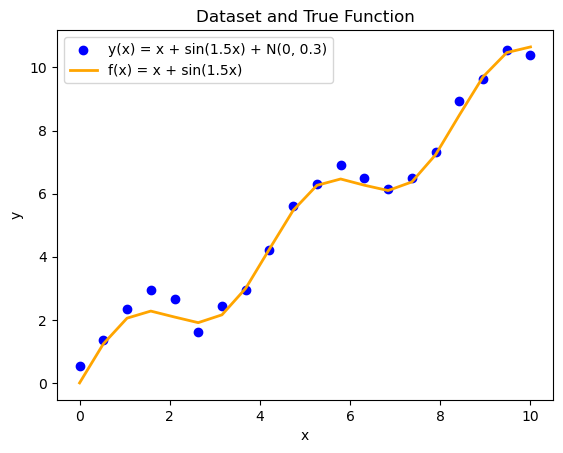

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate x values in the range [0, 10]
x = np.linspace(0, 10, 20)

# Generate y values with noise
y = x + np.sin(1.5 * x) + np.random.normal(0, 0.3, size=x.shape)

# Define the true function f(x)
f_x = x + np.sin(1.5 * x)

# Plot y(x) as a scatter plot and f(x) as a smooth line
plt.scatter(x, y, label="y(x) = x + sin(1.5x) + N(0, 0.3)", color='blue')
plt.plot(x, f_x, label="f(x) = x + sin(1.5x)", color='orange', linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Dataset and True Function")
plt.show()


## Part 3:

Use a weighted sum of polynomials as an estimator function for \( f(x) \). In particular, let the form of the estimator function be:

$$
g_n(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n
$$

Consider three candidate estimators, \( g_1 \), \( g_3 \), and \( g_{10} \). Estimate the coefficients of each of the three estimators using the sampled dataset and plot \( y(x) \), \( f(x) \), \( g_1(x) \), \( g_3(x) \), and \( g_{10}(x) \). Which estimator is underfitting? Which one is overfitting?

[[ 0.5292157 ]
 [ 1.35634568]
 [ 2.34621975]
 [ 2.94962399]
 [ 2.64922919]
 [ 1.61702746]
 [ 2.44322022]
 [ 2.95215438]
 [ 4.21215905]
 [ 5.59258346]
 [ 6.30554059]
 [ 6.90046257]
 [ 6.49521403]
 [ 6.13504696]
 [ 6.50320735]
 [ 7.33225376]
 [ 8.93443848]
 [ 9.64018315]
 [10.56491493]
 [10.39405912]]


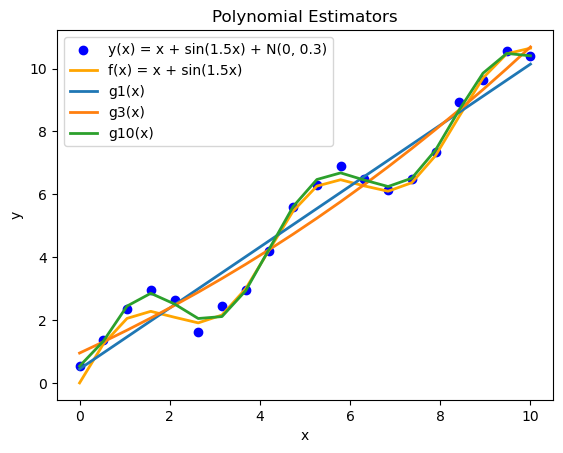

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degrees = [1, 3, 10]
np.random.seed(0)
x = np.linspace(0, 10, 20)
x = x[:, np.newaxis]
y = x + np.sin(1.5 * x) + np.random.normal(0, 0.3, size=x.shape)
print(y)
f_x = x + np.sin(1.5 * x)

plt.scatter(x, y, label="y(x) = x + sin(1.5x) + N(0, 0.3)", color='blue')
plt.plot(x, f_x, label="f(x) = x + sin(1.5x)", color='orange', linewidth=2)

# Fit polynomial models for d 1, 3, 10
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    y_pred = model.predict(x[:])
    plt.plot(x, y_pred, label=f'g{degree}(x)', linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Estimators")
plt.show()

# Interpretation:
# - g1(x) is likely underfitting the data.
# - g10(x) is likely overfitting the data.
# - g3(x) may provide a good balance between underfitting and overfitting.
